In [10]:
train_data="F:\\savinglifes\\train"
test_data="F:\\savinglifes\\test"

In [11]:
def one_hot_label(img):
    label=img.split('.')[0]
    if label=='harmful':
        ohl=np.array([1,0])
    elif label=='Notharmful':
        ohl=np.array([0,1])
    return ohl
def train_data_with_label():
    train_images=[]
    for i in tqdm(os.listdir(train_data)):
        path=os.path.join(train_data,i)
        #print(path)
        #img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        #print(img)
        #print(img.shape)
        #img=img.resize(img,(64,64,1))
        img=cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE), (64,64), interpolation=cv2.INTER_CUBIC)
        train_images.append([np.array(img),one_hot_label(i)])
    shuffle(train_images)
    return train_images
def test_data_with_label():
    test_images=[]
    for i in tqdm(os.listdir(test_data)):
        path=os.path.join(test_data,i)
        #img=(cv2.imread(path,cv2.IMREAD_GRAYSCALE))
        #img=img.resize(img,(64,64,1))
        img=cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE), (64,64), interpolation=cv2.INTER_CUBIC)
        test_images.append([np.array(img),one_hot_label(i)])
    shuffle(test_images)
    return test_images

In [12]:
import cv2
import numpy as np
import os
from tqdm import tqdm
from random import shuffle

In [13]:
training_images = train_data_with_label()
tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,64,64,1)
tr_lbl_data = np.array([i[1] for i in training_images])

100%|████████████████████████████████████████| 689/689 [00:23<00:00, 29.58it/s]


In [14]:
testing_images = test_data_with_label()
tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,64,64,1)
tst_lbl_data = np.array([i[1] for i in testing_images])

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 27.26it/s]


In [15]:
from keras.models import Sequential
from keras.layers import *
from keras.layers import Dropout
from keras.optimizers import *

Using TensorFlow backend.


In [16]:

model=Sequential()
model.add(InputLayer(input_shape=[64,64,1]))
model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=50,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=80,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

optimizer=Adam(lr=1e-3)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x=tr_img_data,y=tr_lbl_data,epochs=50,batch_size=100)
model.summary()

Epoch 1/50
689/689 [==============================] - ETA: 27s - loss: 5.2647 - acc: 0.50 - ETA: 15s - loss: 5.9953 - acc: 0.52 - ETA: 9s - loss: 6.1893 - acc: 0.5033 - ETA: 6s - loss: 6.2842 - acc: 0.497 - ETA: 3s - loss: 6.4501 - acc: 0.498 - ETA: 1s - loss: 6.5070 - acc: 0.498 - 12s 17ms/step - loss: 6.4586 - acc: 0.4978
Epoch 2/50
689/689 [==============================] - ETA: 3s - loss: 5.2466 - acc: 0.480 - ETA: 2s - loss: 5.1551 - acc: 0.475 - ETA: 2s - loss: 4.6262 - acc: 0.473 - ETA: 1s - loss: 4.2331 - acc: 0.485 - ETA: 1s - loss: 3.8923 - acc: 0.504 - ETA: 0s - loss: 3.5087 - acc: 0.508 - 4s 6ms/step - loss: 3.2162 - acc: 0.5167
Epoch 3/50
689/689 [==============================] - ETA: 3s - loss: 1.0219 - acc: 0.510 - ETA: 2s - loss: 0.9918 - acc: 0.530 - ETA: 2s - loss: 0.9241 - acc: 0.530 - ETA: 1s - loss: 0.9012 - acc: 0.527 - ETA: 1s - loss: 0.8688 - acc: 0.522 - ETA: 0s - loss: 0.8547 - acc: 0.510 - 4s 6ms/step - loss: 0.8314 - acc: 0.5283
Epoch 4/50
689/689 [========

689/689 [==============================] - ETA: 3s - loss: 0.1479 - acc: 0.950 - ETA: 3s - loss: 0.1091 - acc: 0.970 - ETA: 2s - loss: 0.0987 - acc: 0.970 - ETA: 1s - loss: 0.1002 - acc: 0.972 - ETA: 1s - loss: 0.1040 - acc: 0.968 - ETA: 0s - loss: 0.0971 - acc: 0.971 - 4s 6ms/step - loss: 0.0907 - acc: 0.9739
Epoch 27/50
689/689 [==============================] - ETA: 3s - loss: 0.0776 - acc: 0.970 - ETA: 2s - loss: 0.0710 - acc: 0.970 - ETA: 2s - loss: 0.0633 - acc: 0.976 - ETA: 1s - loss: 0.0723 - acc: 0.972 - ETA: 1s - loss: 0.0765 - acc: 0.970 - ETA: 0s - loss: 0.0802 - acc: 0.968 - 4s 6ms/step - loss: 0.0801 - acc: 0.9666
Epoch 28/50
689/689 [==============================] - ETA: 3s - loss: 0.0503 - acc: 0.980 - ETA: 2s - loss: 0.0427 - acc: 0.985 - ETA: 2s - loss: 0.0500 - acc: 0.983 - ETA: 1s - loss: 0.0468 - acc: 0.985 - ETA: 1s - loss: 0.0519 - acc: 0.982 - ETA: 0s - loss: 0.0587 - acc: 0.981 - 4s 6ms/step - loss: 0.0586 - acc: 0.9826
Epoch 29/50
689/689 [===================

Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 50)        40050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 50)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 80)          100080    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 80)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 80)          0         
_________________________________________________________________
flatten_1 

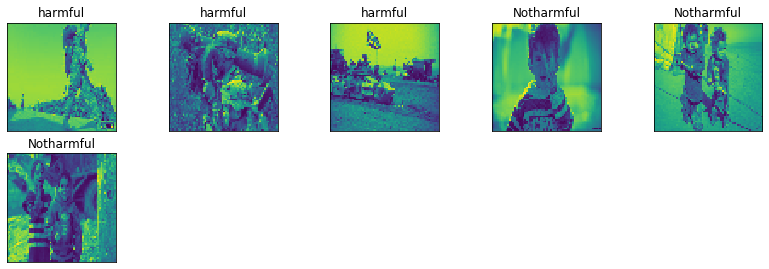

In [19]:
#model = load_model('fire.h5')
import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(14,14))
for cnt,data in enumerate(testing_images[0:7]):
    y=fig.add_subplot(6,5,cnt+1)
    img=data[0]
    data=img.reshape(1,64,64,1)
    model_out=model.predict([data])
    if np.argmax(model_out)==1:
        str_label='Notharmful'
    else:
        str_label='harmful'
    y.imshow(img)
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)